# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'), categories = categories
                                      )
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'), categories = categories
                                    )

num_test = len(newsgroups_test.target)
print(num_test)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

1353
training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(0,num_examples):
        print("Training Sample index is : {0:2d}". format(i), "\n=============================")
        print("The label is : ", newsgroups_train.target_names[train_labels[i]])
        print("The message string is : ", train_data[i], "\n")

### STUDENT END ###
P1(5)

Training Sample index is :  0 
The label is :  comp.graphics
The message string is :  Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

Training Sample index is :  1 
The label is :  talk.religion.misc
The message string is :  

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mani

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [4]:
#def P2():
### STUDENT START ###
vectorizer = CountVectorizer(min_df = 1)
featureVector = vectorizer.fit_transform(train_data)

# Use default configuration to tokenize the train_data by extracting words
analyze = vectorizer.build_analyzer()

# Part a
print('\nPart a: \n======= \nThe vector shape is : {}'.format(featureVector.shape))
print('The size of the vocabulary is : {:5d}'.format(featureVector.shape[1]))

# What is the average number of non-zero examples per sample
s = np.mean(featureVector[0:].getnnz(axis = 1))

# What fraction of entries in the matrix are non-zero
nonZeroEntries = featureVector.nnz
print('The number of non-zero entries is : {0:7d}'.format(nonZeroEntries))
fractionNZ = nonZeroEntries/(featureVector.shape[0] * featureVector.shape[1])
print("The average number of non-zer entries per sample is {0:6.3f}".format(s))
print('The fraction of non-zero entries is (non zero entries/vector size): {0:7.5f}'.format(fractionNZ))


# Part b
featureNames = vectorizer.get_feature_names()
print('\nPart b: \n======= \nThe zeroth feature string is : {:>5s}'.format(featureNames[0]))
print('The last feature string is : {:>5s}'.format(featureNames[-1]))

# Part c
vectorizer = CountVectorizer(min_df=1, vocabulary = ["atheism", "graphics", "space", "religion"])
vocabVectorizer = vectorizer.fit_transform(train_data)

print('\nPart c: \n======= \nConfirmation: The 4 word vectorizer shape is : {}'.format(vocabVectorizer.shape))
#fractionNZ = nonZeroEntries/(vocabVectorizer.shape[0] * vocabVectorizer.shape[1])
avgNonZeroExamples = np.mean(vocabVectorizer[0:].getnnz(axis = 1))
print('The fraction of non-zero entries is : {0:7.5f}'.format(avgNonZeroExamples))

# Part d
multigram_vectorizer = CountVectorizer(ngram_range=(2,3), analyzer="char")
multigramFeatureVector = multigram_vectorizer.fit_transform(train_data)
# print('\nPart d: \n======= \nThe number of rows of the mutigram feature vector is : {0:5d}'\
#                                          .format(multigramFeatureVector.shape[0]))
print('The number of columns of the mutigram feature vector is : {0:5d}'.format(multigramFeatureVector.shape[1]))


# Part e
vectorizer10Docs = CountVectorizer(min_df = 10)
feature_vector = vectorizer10Docs.fit_transform(train_data)
print ('\nPart e :\n======= \nThe size of the vocabulary (with min_df = 10) is : {0:5d} '.format(feature_vector.shape[1]))
vectorizer = CountVectorizer()
vectorizer.fit(train_data)
featureNamesTrain = vectorizer.get_feature_names()
vectorizerDev = CountVectorizer()
vectorizerDev.fit(dev_data)
featureNamesDev = vectorizerDev.get_feature_names()

# Get difference in sets
wordDifference = set(featureNamesDev) - set(featureNamesTrain)
print("\nPart f: \n=======\nThe faction of missing words in dev data missing from vocabulary is {0:8.5f}".format(len(wordDifference)/len(featureNamesDev)))

### STUDENT END ###
#P2()


Part a: 
The vector shape is : (2034, 26879)
The size of the vocabulary is : 26879
The number of non-zero entries is :  196700
The average number of non-zer entries per sample is 96.706
The fraction of non-zero entries is (non zero entries/vector size): 0.00360

Part b: 
The zeroth feature string is :    00
The last feature string is : zyxel

Part c: 
Confirmation: The 4 word vectorizer shape is : (2034, 4)
The fraction of non-zero entries is : 0.26844
The number of columns of the mutigram feature vector is : 35478

Part e :
The size of the vocabulary (with min_df = 10) is :  3064 

Part f: 
The faction of missing words in dev data missing from vocabulary is  0.24788


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [5]:
def optimizeModelParams(modelName):
    
    nNumber = {'n_neighbors': [100, 120, 130, 140, 145, 150, 155, 160, 170, 180]}
    alphaValue = {'alpha': [0.002, 0.003, 0.004, 0.0045, 0.005, 0.006, 0.01, 0.02, 0.5, 1]}
    cWeights = { 'C': [.01, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.8] }
    
    vectorizer = CountVectorizer()
    vectorTrain = vectorizer.fit_transform(train_data)

    if modelName == "KNN":
        model = KNeighborsClassifier()
        model = GridSearchCV(model, nNumber)
        model.fit(vectorTrain, train_labels)
    
    elif modelName == "MNB":
        model = MultinomialNB()
        model = GridSearchCV(model, alphaValue)
        model.fit(vectorTrain, train_labels)
    
    elif modelName == "LR":
        model = LogisticRegression()
        model = GridSearchCV(model, cWeights)
        model.fit(vectorTrain, train_labels)
    else:
        print("Unknown Model")

    print('The best parameter for model {} is {}'.format(modelName, model.best_params_))
    return

for model in ["KNN", "MNB", "LR"]:
    optimizeModelParams(model)


# For each of the 3 model types
# vectorize, fit and predict Dev data
vectorizerModel = CountVectorizer()
vectorTrain = vectorizerModel.fit_transform(train_data)
vectorDev = vectorizerModel.transform(dev_data)

# Model 1: KNN Model 
knnModel = KNeighborsClassifier(n_neighbors = 150)
knnModel.fit(vectorTrain, train_labels)
knnModel.pred = knnModel.predict(vectorDev)
knnF1 = metrics.f1_score(dev_labels, knnModel.pred, average='weighted')
print ('KNN: F1 score is {0:7.4f}'.format(knnF1))

# Model 2: MNB Model
mnbModel = MultinomialNB(fit_prior = False, alpha = 0.004)
mnbModel.fit(vectorTrain, train_labels)
mnbModel.pred = mnbModel.predict(vectorDev)
mnbF1 = metrics.f1_score(dev_labels, mnbModel.pred, average='weighted')
print ('MNB: F1 score is {0:7.4f}'.format(mnbF1))

# Model 3: LR Model
LRModel = LogisticRegression(penalty = 'l2', C = 0.2)
LRModel.fit(vectorTrain, train_labels)            
LRModel.pred = LRModel.predict(vectorDev)
lrF1 = metrics.f1_score(dev_labels, LRModel.pred, average='weighted')
print ('LR: F1 score is {0:7.4f}'.format(lrF1))

# Look at accuracy per Todd at office hours : 10/24/2015
# Try a wide range of values so that a nice profile for accuracy (versus C) can be seen
cValue = [0.0001, 0.0005, 0.001, 0.005, 0.008, .01, 0.05, 0.1, 0.2, \
          0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0, 5.0, 10.0]

for C in cValue:
    # Create LR Model and fit
    LRModel = LogisticRegression(C = C)
    LRModel.fit = LRModel.fit(vectorTrain, train_labels)
    
    # Convert the raw text into features
    devVectorWords = vectorizerModel.transform(dev_data)
    
    # Predict using the dev data
    LRModel.pred = LRModel.predict(devVectorWords)
    
    # Get score
    LRModelScore = LRModel.score(vectorDev, dev_labels)
    
    # Compute sum sqauerd of weights
    sumSquaredWeight = np.square(LRModel.coef_).sum(axis=1)
    
    # and the F1 score
    lrF1 = metrics.f1_score(dev_labels, LRModel.pred, average='weighted')
    np.set_printoptions(precision=3)
    # Compute and print square coefficients, 
    print ("Sum squared Weights for C value of {} : {}, Accuracy is {:6.4f}, F1 is {:6.4f}".\
                           format(C, sumSquaredWeight, LRModelScore, lrF1))
    np.set_printoptions(precision=4)

The best parameter for model KNN is {'n_neighbors': 150}
The best parameter for model MNB is {'alpha': 0.004}
The best parameter for model LR is {'C': 0.2}
KNN: F1 score is  0.4220
MNB: F1 score is  0.7666
LR: F1 score is  0.7059
Sum squared Weights for C value of 0.0001 : [ 0.008  0.012  0.009  0.009], Accuracy is 0.5562, F1 is 0.5416
Sum squared Weights for C value of 0.0005 : [ 0.069  0.081  0.074  0.083], Accuracy is 0.6050, F1 is 0.5897
Sum squared Weights for C value of 0.001 : [ 0.165  0.201  0.181  0.187], Accuracy is 0.6376, F1 is 0.6193
Sum squared Weights for C value of 0.005 : [ 1.144  1.398  1.316  1.078], Accuracy is 0.6642, F1 is 0.6467
Sum squared Weights for C value of 0.008 : [ 1.971  2.328  2.241  1.776], Accuracy is 0.6746, F1 is 0.6591
Sum squared Weights for C value of 0.01 : [ 2.541  2.94   2.862  2.25 ], Accuracy is 0.6790, F1 is 0.6647
Sum squared Weights for C value of 0.05 : [ 14.074  13.668  14.604  11.861], Accuracy is 0.6967, F1 is 0.6867
Sum squared Weigh

ANSWER:
#### 1: Why doesn't nearest neighbors work well for this problem?
##### The concept of neighbors in the text domain is not definitively defined so neighbor relationships between words are fuzzy at best. Also the number of word variations within a single word derived from a specific stem word is significant causing very many similar and dissimilar features to have to compare with and convergence will result in a range of convergnece. This causes KNN to not work well. 

#### 2: Any ideas why logistic regression doesn't work as well as Naive Bayes?
##### Naive Bayes can predict across many features that are assumed to be independent and where statistical data is already available. Logistic Regression will outperform GNB via parameter estimation when many training examples are available, but GNB outperforms Logistic Regression when training data is scarce. In this particular case, given the large number of textual features, the test sample is relatively small and so GNB does well. Logistic regression probably overfits the data thanks to the large number of parameters. 

#### 3: Briefly explain the relationship between the sum and the value of C.
##### C is the metric directly associated with the penalty. Hence, the more the C, the more the penalty or sum of squares. Also, the smaller the value of C, the more is the regularization strength. With increased regularization strength (i.e with larger C), the coefficients in the model function are pushed lower . That is, regularization pushes the coefficients to lower values.


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [6]:
def P4():
### STUDENT START ###

    for n in range(1,4):
        vectorizerModel = CountVectorizer(ngram_range = (n,n))
        if n ==1: Name = "Unigram" 
        elif n==2: Name = "Bigram" 
        # do trigram features also just to get more information about behavior
        elif n==3: Name = "Trigram"
        print("\n{} Features: \n-----------------".format(Name))
        
        # Build the vectorizer and sort
        vectorTrain = vectorizerModel.fit_transform(train_data)
        devVectorWords = vectorizerModel.transform(dev_data)
    
        # Build the LR model 
        LRModel = LogisticRegression(penalty = 'l2', C = 0.2)
        LRModel.fit(vectorTrain, train_labels)
        LRModel.pred = LRModel.predict(devVectorWords)
        LRF1 = metrics.f1_score(dev_labels, LRModel.pred, average='weighted')
        # The F1 score can be interpreted as a weighted average of the precision 
        # and recall, where an F1 score reaches its best value at 1 and worst at 0.
        print ('MNB: F1 score is {0:7.4f}'.format(LRF1))
        
        print("The coefficient array is of shape : {}".format(LRModel.coef_.shape))
        
        # Sort the coefficients by row (axis = 1)
        sortedWeights = np.argsort(LRModel.coef_, axis=1)
        
        # Get the master feature name index
        featureNames = np.array(vectorizerModel.get_feature_names())
        
        # There are 4 labels, get the top 5 for each label
        for featureCount in range (0,4):
            # Index into the feature name array and print out the top 5
            print("Features with largest weights for label {} \n {}".\
                      format(newsgroups_train.target_names[featureCount], \
                             featureNames[sortedWeights[featureCount][-5:]]))    

### STUDENT END ###
P4()


Unigram Features: 
-----------------
MNB: F1 score is  0.7059
The coefficient array is of shape : (4, 26879)
Features with largest weights for label alt.atheism 
 ['islam' 'atheists' 'religion' 'atheism' 'bobby']
Features with largest weights for label comp.graphics 
 ['computer' '3d' 'file' 'image' 'graphics']
Features with largest weights for label sci.space 
 ['spacecraft' 'launch' 'nasa' 'orbit' 'space']
Features with largest weights for label talk.religion.misc 
 ['order' 'fbi' 'blood' 'christians' 'christian']

Bigram Features: 
-----------------
MNB: F1 score is  0.6000
The coefficient array is of shape : (4, 194891)
Features with largest weights for label alt.atheism 
 ['are you' 'is not' 'in this' 'claim that' 'cheers kent']
Features with largest weights for label comp.graphics 
 ['comp graphics' 'is there' 'out there' 'in advance' 'looking for']
Features with largest weights for label sci.space 
 ['it was' 'and such' 'sci space' 'the space' 'the moon']
Features with largest 

ANSWER:
#### Any surprising features in this table?
##### With unigram features, specific words and their meanings and connotations are directly related to the classification thanks to the training data. With Bigram features, common bigrams that contain at least one contextual word (learned via training) are properly classified. However, lowered percentage of the total sample (as compared to Unigram) is actually related with a particular classification especially those bigrams that do not contain contextual words. Hence the lower F1 score.

##### Just to understand what happens with larger combinations, trigram results are presented. As with bigrams, trigrams that contain at least one strong contextual word are classified correctly. The more general terms are not classified well. Hence the least F1 score with the 3 tests.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [7]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
        
    # remove special characters
    s = re.sub(r'[@$%^&*+;]', r'', s)
    
    # remove blanks - does not seem to help, comment out for now
    #s = re.sub(r'\b[uU]\b', '', s)
    
    # remove ed", "y", "s" post tags
    s = re.sub(r"ed\b|y\b|s\b", r"", s)

    # remove trailing digits (Lowers the efficiency - comment out for now)
    #s = re.sub(r'\d+$', '', s)

    # replace factors with leading and training numbers with XYZ label
    #s = re.sub( r'^\d*\.?\d+$', "XYZ", s)

    # Convert string to lower case
    s = s.lower()
    
    return s

### STUDENT END ###

def P5():
### STUDENT START ###
    vectorizer = CountVectorizer(preprocessor = empty_preprocessor)
    vectorTrain = vectorizer.fit_transform(train_data)
    vectorDev = vectorizer.transform(dev_data)
    
    # Empty Preprocessor: Get the length of the dictionary
    baseSize = len(vectorizer.get_feature_names())
    
    # Empty Preprocessor case: create and fit an L2 based LR model
    LRModel = LogisticRegression(penalty = 'l2', C = 0.2)
    LRModelFit = LRModel.fit(vectorTrain, train_labels)            
    baseLRPred = LRModel.predict(vectorDev)
    baseF1 = metrics.f1_score(dev_labels, baseLRPred, average='weighted')
    
    newVectorizer = CountVectorizer(preprocessor = better_preprocessor)
    newTable = newVectorizer.fit_transform(train_data)
    newTableDev = newVectorizer.transform(dev_data)
    # Better Preprocessor case: Get the new length of the dictionary
    newSize = len(newVectorizer.get_feature_names())
    
    # Better Preprocessor case: create and fit an L2 based LR model
    newLRModel = LogisticRegression(penalty = 'l2', C = 0.2)
    newLRModelFit = newLRModel.fit(newTable, train_labels)            
    newLRPred = newLRModel.predict(newTableDev)
    newF1 = metrics.f1_score(dev_labels, newLRPred, average='weighted')
 
    # Compute the change in dictionary size as a percentage
    print("Base dictionary size : {}, Processed dictionary size : {} \nPercentage reduction in dictionary size : {:5.3f}".\
                  format(baseSize, newSize, ((baseSize - newSize)/baseSize) * 100))
    # Output the F1 scores to check improvement
    print("\nThe original F1 is : {0:8.4f}, the new F1 is {1:8.4f},\nImprovement in points is {2:4.2f}".\
                          format(baseF1, newF1, (newF1 - baseF1) * 100))

    
### STUDENT END ###
P5()

Base dictionary size : 33291, Processed dictionary size : 24118 
Percentage reduction in dictionary size : 27.554

The original F1 is :   0.7026, the new F1 is   0.7232,
Improvement in points is 2.06


#### Problem 5 - With your new preprocessor, how much did you reduce the size of the dictionary?

##### Base dictionary size : 33291, Processed dictionary size : 24118 
##### Percentage reduction in dictionary size : 27.554
##### The original F1 is :   0.7026, the new F1 is   0.7232,
##### Improvement in points is 2.06

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]


PartI
L1 regularization : Number of non zero coefficients is    619
L2 regularization : Number of non zero coefficients is 107516
Part I : Accuracy of retrained model is  0.6746.

PartII
Accuracy with C value of  0.0020 is  0.4290, vocab size is    5 and F1 is  0.3941
Accuracy with C value of  0.0050 is  0.4482, vocab size is   12 and F1 is  0.4312
Accuracy with C value of  0.0075 is  0.4630, vocab size is   16 and F1 is  0.4450
Accuracy with C value of  0.0090 is  0.4689, vocab size is   16 and F1 is  0.4496
Accuracy with C value of  0.0100 is  0.4689, vocab size is   16 and F1 is  0.4496
Accuracy with C value of  0.0200 is  0.5814, vocab size is   43 and F1 is  0.5699
Accuracy with C value of  0.0300 is  0.6021, vocab size is   66 and F1 is  0.5904
Accuracy with C value of  0.0400 is  0.6272, vocab size is  100 and F1 is  0.6161
Accuracy with C value of  0.0500 is  0.6450, vocab size is  122 and F1 is  0.6365
Accuracy with C value of  0.1000 is  0.6893, vocab size is  211 and F1 is 

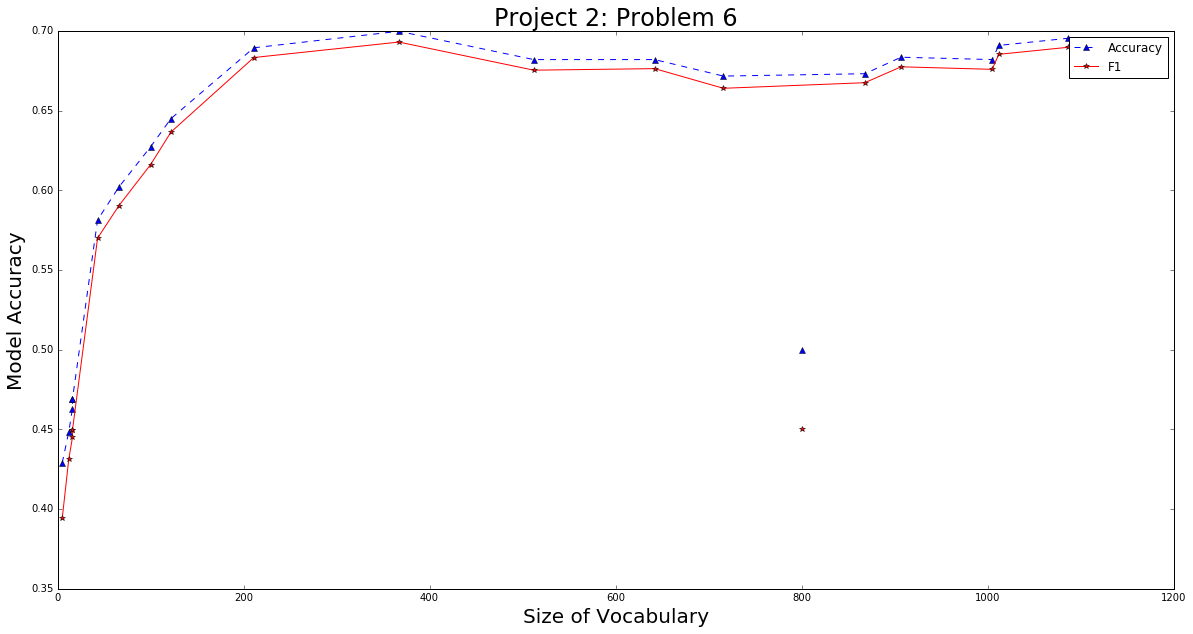

In [8]:
# Per Todd's suggestion, do l1 cost with a bunch of Cs

def P6():
### STUDENT START ###
    # Per the discussion on the W207 slack channel set the randon seed to get consistent results
    # http://scikit-learn.org/stable/faq.html#how-do-i-set-a-random-state-for-an-entire-execution
    np.random.seed(314156)
    
    vectorizer = CountVectorizer()
    vectorTrain = vectorizer.fit_transform(train_data)
    vectorDev = vectorizer.transform(dev_data)
    
    print("\nPartI\n======")
    # LR : L1 penalty with best known C value of 0.2
    # ==============================================
    LRModel = LogisticRegression(penalty = 'l1', C = 0.2)
    LRModelFit = LRModel.fit(vectorTrain, train_labels)
    
    # L1: Keep track of number of coefficients
    coeffLength = len(LRModel.coef_)
    
    # L1: Find the count of non-zero coefficients
    nonZeroCoeff = np.count_nonzero(LRModel.coef_)
    
    # L1: Print the count of non-zero-coefficients
    print ("L1 regularization : Number of non zero coefficients is {0:6d}".format(nonZeroCoeff))
    
    # L1: Keep the non-zero indices, we may need these to extrat the non-zero features
    nonzeroIndicesL1 = np.nonzero(LRModel.coef_)[1]

    # LR : L2 penalty with best C value of 0.2
    # ========================================
    LRModel = LogisticRegression(penalty = 'l2', C = 0.2)
    LRModel.fit(vectorTrain, train_labels)
    
    # L2: Keep track of number of coefficients
    coeffLength = len(LRModel.coef_)
    
    # L2: Find the count of non-zero coefficients
    nonZeroCoeff = np.count_nonzero(LRModel.coef_)
    
    # L2: Print the count of non-zero-coefficients
    print ("L2 regularization : Number of non zero coefficients is {0:6d}".format(nonZeroCoeff))

    # L2: Keep the non-zero indices, we may need these to extract the non-zero features
    nonzeroIndicesL2  = np.nonzero(LRModel.coef_)[1]

    # Simplify the variable name for future use, also only keep unique L1 names to avoid error
    nonzeroIndices = np.unique(nonzeroIndicesL1)
    nonzeroVocabulary = np.array(vectorizer.get_feature_names())[nonzeroIndices]
    
    # ================================================
    # Use the non-zero vocabulary to build a new model
    # ================================================
    vectorizer = CountVectorizer(vocabulary = nonzeroVocabulary)
    vectorTrain = vectorizer.fit_transform(train_data)
    vectorDev = vectorizer.transform(dev_data)

    # =======================================
    # Retrain a LR model and fit the dev data
    # =======================================
    LRModel = LogisticRegression(penalty = 'l2', C = 1.0, tol = 0.01)
    LRModelFit = LRModel.fit(vectorTrain, train_labels)
    print ("Part I : Accuracy of retrained model is {0:7.4f}.".format(LRModel.score(vectorDev, dev_labels)))
    
    # Initialize Parameters, use smaller list to keep computation time minimal
    cValue = [0.002, 0.005, 0.0075, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, \
                                  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

    # Allocate lists for values needed for graphing
    lrF1 = [] # For F1 Values
    vocabularySize = [] # For vocabulary size
    modelAccuracy = [] # for accuracy
    
    print("\nPartII\n======")
    # =================================================================================
    # Make a plot showing accuracy of the re-trained model vs. the 
    # vocabulary size you get when pruning unused features by adjusting the C parameter.
    # =================================================================================
    # Iterate while adjusting the cValue
    for C in cValue:
        # Create the Model and fit the training data
        vectorizer = CountVectorizer()
        vectorTrain = vectorizer.fit_transform(train_data)
        
        # Fit a L1 model
        LRModel = LogisticRegression(penalty = 'l1', C = C, tol = 0.01)
        LRModelFit = LRModel.fit(vectorTrain, train_labels)
        
        # L1: Keep track of total number of coefficients
        coeffLength = len(LRModel.coef_)
    
        # L1: Find the count of non-zero coefficients
        nonZeroCoeff = np.count_nonzero(LRModel.coef_)

        # L1: Keep only the non-zero indices, we may need these to extract the non-zero features
        nonzeroIndicesL1  = np.nonzero(LRModel.coef_)[1]

        # Simplify the variable name for future use, also only keep unique feature names to avoid error
        nonzeroIndices = np.unique(nonzeroIndicesL1)
        nonzeroVocabulary = np.array(vectorizer.get_feature_names())[nonzeroIndices]
    
        # ==============================================================
        # Use the non-zero vocabulary from L1 Model to build a new model
        # ==============================================================
        vectorizer = CountVectorizer(vocabulary = nonzeroVocabulary)
        vectorTrain = vectorizer.fit_transform(train_data)
        vectorDev = vectorizer.transform(dev_data)

        # =======================================
        # Retrain a LR model and fit the dev data
        # =======================================
        LRModel = LogisticRegression(penalty = 'l2', C = 0.2, tol = 0.01)
        LRModelFit = LRModelFit = LRModel.fit(vectorTrain, train_labels)
        devVectorWords = vectorizer.transform(dev_data)
        
        # Predict using the dev vector
        LRModelPred = LRModel.predict(devVectorWords)
        
        # Record the F1 value and append to F1 list
        LRF1 = metrics.f1_score(dev_labels, LRModelPred, average='weighted')
        lrF1.append(LRF1)
        
        # Print the output
        print ("Accuracy with C value of {0:7.4f} is {1:7.4f}, vocab size is {2:4d} and F1 is {3:7.4f}".\
                        format(C, LRModel.score(vectorDev, dev_labels), len(nonzeroVocabulary), LRF1))
        
        # Update the vocabulary length list
        vocabularySize.append(len(nonzeroVocabulary))
        
        # Determine accuracy of model and add to list
        accuracy = LRModel.score(vectorDev, dev_labels)
        modelAccuracy.append(accuracy)
        #print(C, modelAccuracy)
        
        # Computation takes long, print a I'm alive signal
        #print("Completed iteration with cValue : {0:8.4f}, accuracy is {1:8.4f}".format(C, accuracy))
    
    # Per Todd : Plot accuracy versus number of features
    

    # Plot the graph
    plt.figure(figsize=(20,10))
    plt.xlabel("Size of Vocabulary", fontsize = 20)
    plt.ylabel("Model Accuracy", fontsize = 20)
    plt.plot(vocabularySize, modelAccuracy, '--b^', vocabularySize, lrF1, '-r*')
    plt.title('Project 2: Problem 6', fontsize = 24)
    plt.plot(800, 0.5,'b--^', label='Accuracy')
    plt.plot(800, 0.45,'r-*', label='F1')
    plt.legend( loc='best', numpoints = 1 )
    
    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [10]:
def P7():
    ### STUDENT START ###
    
    # Use the TdfIdf Vectorizer
    vectorizer = TfidfVectorizer()
    vectorTrain = vectorizer.fit_transform(train_data)
    
    # Transform the dev_data into vector 
    #vectorDev = vectorizer.transform(dev_data)
    devVectorWords = vectorizer.transform(dev_data)

    # Train a logistic regression model with C=100
    LRModel = LogisticRegression(C = 100)
    LRModelfit = LRModel.fit(vectorTrain, train_labels)
    LRModelPred = LRModel.predict(devVectorWords)
    
    # Compute the probabilities
    # http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    LRModelProb = LRModel.predict_proba(devVectorWords)
    
    
    # Create a couple of lists for storing R and probabilities
    # where R = maximum predicted probability / predicted probability
    rValueList = []
    devDataList = []
    devLabelList = []
        
    # Iterate through each set of 4 probability entries for all of the predicted data
    for index in range(0, len(LRModelProb)):
        
        # Index into the predicted data, extract the 4 element probability vector
        classification = np.array(LRModelProb[index])
        
        # Get the max probability value from the 4 element probability vector
        maxValue = max(classification)
        
        # Find the sub index of the max probability in the probability vector
        indexMax = np.argmax(classification)
        
        # Read the actual label from the dev_labels stack and determine its corresponding
        # probability value from the 4 element probability vector
        probActual = LRModelProb[index][dev_labels[index]]
        devLabelList.append(dev_labels[index])
    
        # Save the corresponding data as well, we'll need to print the top 3
        devDataList.append(dev_data[index])

        # Compute R
        # R = maximum predicted probability / predicted probability
        rValue = maxValue/probActual
        
        # Save the R values in the assigned list
        rValueList.append(rValue)    
        
    # Sort all saved lists in decreasing order, We need to extract the top 3
    # save the list and than reverse the list so that the highest R values are first
    origValueList = rValueList
    rValueList = np.array(rValueList).argsort()[::-1]

    # Need to show the top 3 entries
    for index in rValueList[0:3]:
        # set print parameters
        np.set_printoptions(precision=3)
        print("\n\nThe entry at offset {} :\n======================".format(index))
        
        # Print the requested data
        print("The R Value is {:10.4f}".format(origValueList[index]))
        print("The actual categorized label is {}".format(newsgroups_train.target_names[dev_labels[index]]))
        print("The new label is {}".format(categories[devLabelList[index]]))
        
        # Only print a few humdred characters
        print("The corresponding text is:\n {}".format(devDataList[index]))


    ### STUDENT END ###
P7()



The entry at offset 215 :
The R Value is   929.3583
The actual categorized label is talk.religion.misc
The new label is sci.space
The corresponding text is:
 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their

#### ANSWER:

##### With text classification,  training relies upon anchor words or key words learned from the training data. With the 3 classifications shown above, when key words from one training classification appear within the text space of another training classificaton, the classifier might errorneously conclude the wrong class. Specifically, for the first case above, key words such as FTP, ASCII, LaTex et al. are associated with the class sci.space while the passage is reallay about religion.

##### Suggestion: With Tdf/Idf, weight words depending upon where they appear in the document. A keyword that appears early in the document is to be given a much higher weight than keywords that appear later in the document. Also when a keyword appears many times in the early part of a document, weight with a multiplicative scale. In the above case, a multiplcative weight allocated to the word "Mormon" would have weighted the classification the right way. Internet related words appear after the word Mormon.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance